# Import Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data


* The data was retrieved from the [BioLINCC](https://biolincc.nhlbi.nih.gov/teaching/) website
* Data was obtained from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts which was collected during three examination periods, approximately 6 years apart, from roughly 1956 to 1968
* Missing values in the dataset are indicated by a period (.)
* Disclaimer: This is teaching data that has been rendered anonymous through the application of certain statistical processes such as permutations and/or random visit selection. We cannot claim or imply that any inferences derived from the teaching datasets are valid estimates

## Data Dictionary

|Variable|Description|Variable Type|Levels (if applicable)/<br> Notes|
| --- | --- |---|---|
|RANDID | Unique identification number for each participant|NA||
|SEX | Participant sex|Categorical|1=Men <br> 2=Women|
|PERIOD|Examination Cycle|Categorical|1=Period 1 <br> 2=Period 2 <br> 3=Period 3|
|AGE|Age at exam (years)|Continuous|
|SYSBP|Systolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|Continuous|
|DIABP|Diastolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|Continuous|
|BPMEDS|Use of Anti-hypertensive medication at exam|Categorical|0=Not currently used <br> 1=Current Use|
|CURSMOKE|Current cigarette smoking at exam|Categorical|0=Not current smoker <br> 1=Current smoker|
|CIGPDAY|Number of cigarettes smoked each day|Continuous|0=Not current smoker <br> 1-90 cigarettes per day|
|TOTCHOL|Serum Total Cholesterol (mg/dL)|Continuous|
|HDLC|High Density Lipoprotein Cholesterol (mg/dL)|Continuous|Available for period 3 only|
|LDLC|Low Density Lipoprotein Cholesterol (mg/dL)|Continuous|Available for period 3 only|
|BMI|Body Mass Index, weight in kilograms/height <br> meters squared|Continuous|
|GLUCOSE|Casual serum glucose (mg/dL)|Continuous|
|DIABETES|Diabetic according to criteria of first exam <br> treated or first exam with casual glucose <br> of 200 mg/dL or more|Categorical|0=Not a diabetic <br> 1=Diabetic|
|HEARTRTE|Heart rate (Ventricular rate) in beats/min|Continuous|
|PREVHYP|Prevalent Hypertensive. Subject was defined as <br> hypertensive if treated or if second exam at <br>which mean systolic was >=140 mmHg or mean<br>  Diastolic >=90 mmHg|Categorical|0=Free of disease <br> 1=Prevalent disease|
|ANYCHD|Angina Pectoris, <br> Myocardial infarction (Hospitalized and silent or unrecognized), <br>Coronary Insufficiency (Unstable Angina), <br> or Fatal Coronary Heart Disease|Categorical|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|STROKE|Atherothrombotic infarction, <br>Cerebral Embolism, <br>Intracerebral Hemorrhage, <br> or Subarachnoid Hemorrhage, <br> or Fatal Cerebrovascular Disease|Categorical|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|DEATH|Death from any cause|Categorical|0=Event did not occur during follow up <br> 1=Event occurred during followup|

In [3]:
framingham = pd.read_csv('/Users/silviacatalina/Google Drive/BethelTech/GitHub/wozU-DataSci/DS0110-FinalProject/Framingham/Data/csv/frmgham2.csv', na_values=".")
pd.options.display.max_columns = None
framingham.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,4.0,0,0,0,0,0,0,1,NaN,NaN,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,0.0,69.0,92.0,4.0,0,0,0,0,0,4628,3,31.0,178.0,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,2.0,0,0,0,0,0,0,1,NaN,NaN,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,0.0,80.0,86.0,2.0,0,0,0,0,0,2156,2,NaN,NaN,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,2.0,0,0,0,0,0,4344,3,54.0,141.0,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [4]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

# Data Wrangling

## Selecting Columns of Interest

### List of original columns
RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,PREVCHD,PREVAP,
PREVMI,PREVSTRK,PREVHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,TIMEAP,
TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP

In [5]:
framingham1 = framingham[['RANDID', 'SEX', 'PERIOD', 'AGE', 'SYSBP', 'DIABP', 'BPMEDS', 'CURSMOKE', 
                          'CIGPDAY', 'TOTCHOL', 'HDLC', 'LDLC', 'BMI', 'GLUCOSE', 'DIABETES', 'HEARTRTE', 
                          'PREVHYP', 'ANYCHD', 'STROKE', 'DEATH']]
framingham1.head()

,RANDID,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,2448,1,1,39,106.0,70.0,0.0,0,0.0,195.0,NaN,NaN,26.97,77.0,0,80.0,0,1,0,0
1,2448,1,3,52,121.0,66.0,0.0,0,0.0,209.0,31.0,178.0,NaN,92.0,0,69.0,0,1,0,0
2,6238,2,1,46,121.0,81.0,0.0,0,0.0,250.0,NaN,NaN,28.73,76.0,0,95.0,0,0,0,0
3,6238,2,2,52,105.0,69.5,0.0,0,0.0,260.0,NaN,NaN,29.43,86.0,0,80.0,0,0,0,0
4,6238,2,3,58,108.0,66.0,0.0,0,0.0,237.0,54.0,141.0,28.50,71.0,0,80.0,0,0,0,0


In [6]:
framingham1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   PERIOD    11627 non-null  int64  
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   BPMEDS    11034 non-null  float64
 7   CURSMOKE  11627 non-null  int64  
 8   CIGPDAY   11548 non-null  float64
 9   TOTCHOL   11218 non-null  float64
 10  HDLC      3027 non-null   float64
 11  LDLC      3026 non-null   float64
 12  BMI       11575 non-null  float64
 13  GLUCOSE   10187 non-null  float64
 14  DIABETES  11627 non-null  int64  
 15  HEARTRTE  11621 non-null  float64
 16  PREVHYP   11627 non-null  int64  
 17  ANYCHD    11627 non-null  int64  
 18  STROKE    11627 non-null  int64  
 19  DEATH     11627 non-null  int64  
dtypes: float64(10), int64(10)
me

### Subset data to periods 1, 2, 3; Remove NAs; Reset indexes
* Variables removed: PERIOD and HDLC, LDLC for periods 1 and 2

In [7]:
framinghamP1 = framingham1[framingham1['PERIOD'] == 1].copy()
framinghamP1.head()

,RANDID,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,2448,1,1,39,106.0,70.0,0.0,0,0.0,195.0,NaN,NaN,26.97,77.0,0,80.0,0,1,0,0
2,6238,2,1,46,121.0,81.0,0.0,0,0.0,250.0,NaN,NaN,28.73,76.0,0,95.0,0,0,0,0
5,9428,1,1,48,127.5,80.0,0.0,1,20.0,245.0,NaN,NaN,25.34,70.0,0,75.0,0,0,0,0
7,10552,2,1,61,150.0,95.0,0.0,1,30.0,225.0,NaN,NaN,28.58,103.0,0,65.0,1,0,1,1
9,11252,2,1,46,130.0,84.0,0.0,1,23.0,285.0,NaN,NaN,23.10,85.0,0,85.0,0,0,0,0


In [8]:
framinghamP1.drop(['PERIOD', 'HDLC', 'LDLC'], axis=1, inplace=True)
framinghamP1.dropna(inplace=True)
framinghamP1.reset_index(drop=True, inplace = True)
framinghamP1.head()

,RANDID,SEX,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,2448,1,39,106.0,70.0,0.0,0,0.0,195.0,26.97,77.0,0,80.0,0,1,0,0
1,6238,2,46,121.0,81.0,0.0,0,0.0,250.0,28.73,76.0,0,95.0,0,0,0,0
2,9428,1,48,127.5,80.0,0.0,1,20.0,245.0,25.34,70.0,0,75.0,0,0,0,0
3,10552,2,61,150.0,95.0,0.0,1,30.0,225.0,28.58,103.0,0,65.0,1,0,1,1
4,11252,2,46,130.0,84.0,0.0,1,23.0,285.0,23.10,85.0,0,85.0,0,0,0,0


In [9]:
framinghamP2 = framingham1[framingham1['PERIOD'] == 2].copy()
framinghamP2.head()

,RANDID,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
3,6238,2,2,52,105.0,69.5,0.0,0,0.0,260.0,NaN,NaN,29.43,86.0,0,80.0,0,0,0,0
6,9428,1,2,54,141.0,89.0,0.0,1,30.0,283.0,NaN,NaN,25.34,87.0,0,75.0,0,0,0,0
8,10552,2,2,67,183.0,109.0,0.0,1,20.0,232.0,NaN,NaN,30.18,89.0,0,60.0,1,0,1,1
10,11252,2,2,51,109.0,77.0,0.0,1,30.0,343.0,NaN,NaN,23.48,72.0,0,90.0,0,0,0,0
13,11263,2,2,49,177.0,102.0,1.0,0,0.0,230.0,NaN,NaN,31.36,86.0,0,120.0,1,1,0,0


In [10]:
framinghamP2.drop(['PERIOD', 'HDLC', 'LDLC'], axis=1, inplace=True)
framinghamP2.dropna(inplace=True)
framinghamP2.reset_index(drop=True, inplace = True)
framinghamP2.head()

,RANDID,SEX,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,6238,2,52,105.0,69.5,0.0,0,0.0,260.0,29.43,86.0,0,80.0,0,0,0,0
1,9428,1,54,141.0,89.0,0.0,1,30.0,283.0,25.34,87.0,0,75.0,0,0,0,0
2,10552,2,67,183.0,109.0,0.0,1,20.0,232.0,30.18,89.0,0,60.0,1,0,1,1
3,11252,2,51,109.0,77.0,0.0,1,30.0,343.0,23.48,72.0,0,90.0,0,0,0,0
4,11263,2,49,177.0,102.0,1.0,0,0.0,230.0,31.36,86.0,0,120.0,1,1,0,0


In [11]:
framinghamP3 = framingham1[framingham1['PERIOD'] == 3].copy()
framinghamP3.head()

,RANDID,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
1,2448,1,3,52,121.0,66.0,0.0,0,0.0,209.0,31.0,178.0,NaN,92.0,0,69.0,0,1,0,0
4,6238,2,3,58,108.0,66.0,0.0,0,0.0,237.0,54.0,141.0,28.50,71.0,0,80.0,0,0,0,0
11,11252,2,3,58,155.0,90.0,0.0,1,30.0,NaN,NaN,NaN,24.61,NaN,0,74.0,1,0,0,0
14,11263,2,3,55,180.0,106.0,1.0,0,0.0,220.0,46.0,135.0,31.17,81.0,1,86.0,1,1,0,0
19,12806,2,3,57,110.0,46.0,0.0,1,30.0,320.0,34.0,286.0,22.02,87.0,0,75.0,0,0,0,0


In [12]:
framinghamP3.drop(['PERIOD'], axis=1, inplace=True)
framinghamP3.dropna(inplace=True)
framinghamP3.reset_index(drop=True, inplace = True)
framinghamP3.head()

,RANDID,SEX,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,6238,2,58,108.0,66.0,0.0,0,0.0,237.0,54.0,141.0,28.50,71.0,0,80.0,0,0,0,0
1,11263,2,55,180.0,106.0,1.0,0,0.0,220.0,46.0,135.0,31.17,81.0,1,86.0,1,1,0,0
2,12806,2,57,110.0,46.0,0.0,1,30.0,320.0,34.0,286.0,22.02,87.0,0,75.0,0,0,0,0
3,14367,1,64,168.0,100.0,0.0,0,0.0,280.0,44.0,236.0,25.72,82.0,0,92.0,1,0,0,0
4,16365,1,55,173.0,123.0,1.0,0,0.0,211.0,48.0,163.0,29.11,85.0,0,75.0,1,0,0,0


## Setting variables with whole numbers to integers

In [13]:
framinghamP1.BPMEDS = framinghamP1.BPMEDS.astype(int)
framinghamP1.CIGPDAY = framinghamP1.CIGPDAY.astype(int)
framinghamP1.TOTCHOL = framinghamP1.TOTCHOL.astype(int)
framinghamP1.GLUCOSE = framinghamP1.GLUCOSE.astype(int)
framinghamP1.HEARTRTE = framinghamP1.HEARTRTE.astype(int)

In [14]:
framinghamP2.BPMEDS = framinghamP2.BPMEDS.astype(int)
framinghamP2.CIGPDAY = framinghamP2.CIGPDAY.astype(int)
framinghamP2.TOTCHOL = framinghamP2.TOTCHOL.astype(int)
framinghamP2.GLUCOSE = framinghamP2.GLUCOSE.astype(int)
framinghamP2.HEARTRTE = framinghamP2.HEARTRTE.astype(int)

In [15]:
framinghamP3.BPMEDS = framinghamP3.BPMEDS.astype(int)
framinghamP3.CIGPDAY = framinghamP3.CIGPDAY.astype(int)
framinghamP3.TOTCHOL = framinghamP3.TOTCHOL.astype(int)
framinghamP3.GLUCOSE = framinghamP3.GLUCOSE.astype(int)
framinghamP3.HEARTRTE = framinghamP3.HEARTRTE.astype(int)

## Subset dataframes for Periods 1, 2, 3

In [16]:
frmgP1TrimmedCHD = framinghamP1[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'GLUCOSE', 'HEARTRTE', 'ANYCHD']].copy()
frmgP2TrimmedCHD = framinghamP2[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'GLUCOSE', 'HEARTRTE', 'ANYCHD']].copy()
frmgP3TrimmedCHD = framinghamP3[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'GLUCOSE', 'HEARTRTE', 'ANYCHD']].copy()

In [17]:
frmgP1TrimmedDTH = framinghamP1[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'HEARTRTE', 'ANYCHD', 'STROKE', 'DEATH']].copy()
frmgP2TrimmedDTH = framinghamP2[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'HEARTRTE', 'ANYCHD', 'STROKE', 'DEATH']].copy()
frmgP3TrimmedDTH = framinghamP3[['AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'BMI', 'HEARTRTE', 'ANYCHD', 'STROKE', 'DEATH']].copy()

# Random Forests
---

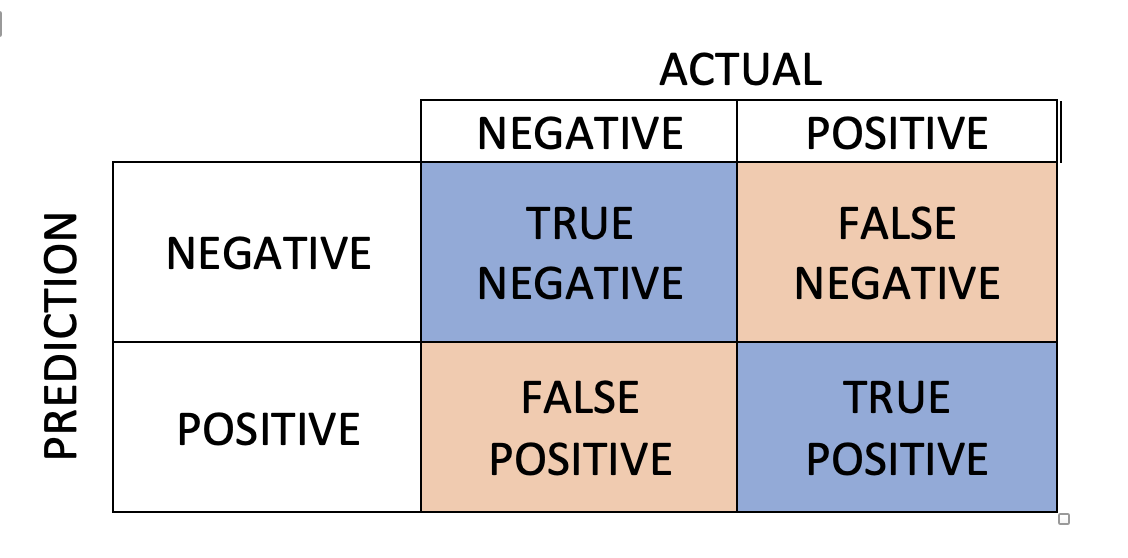

### Confusion matrix basics:
* False Positives (FP) are the instances that the model predicts to be positive but are actually negative, a.k.a. **Type I error**
* False Negatives (FN) are the instances that the model predicts to be negative but are actually positive, a.k.a. **Type II error**
* **Precision** is the percentage of true positives (TP) out of all of the positives predicted (TP + FP)
* **Recall** is the percentage of true positives (TP) out of the total positive (TP + FN)
* When predicting coronary heart disease and/or death, we are looking for the false negatives to be as low as possible, so we'll be focusing on getting the highest recall possible, and not necessarily the highest precision

## Additional packages 

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# CHD
---
## Random Forest for Period 1 (ANYCHD)

In [19]:
framinghamP1.head()

,RANDID,SEX,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,2448,1,39,106.0,70.0,0,0,0,195,26.97,77,0,80,0,1,0,0
1,6238,2,46,121.0,81.0,0,0,0,250,28.73,76,0,95,0,0,0,0
2,9428,1,48,127.5,80.0,0,1,20,245,25.34,70,0,75,0,0,0,0
3,10552,2,61,150.0,95.0,0,1,30,225,28.58,103,0,65,1,0,1,1
4,11252,2,46,130.0,84.0,0,1,23,285,23.10,85,0,85,0,0,0,0


## Train Test Split

In [20]:
x = framinghamP1.drop(['RANDID', 'ANYCHD', 'STROKE','DEATH'], axis = 1)
y = framinghamP1['ANYCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=76)

## Initial Random Forest Model

In [21]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

## Evaluate Model Fit

In [22]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[764  80]
 [263  72]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       844
           1       0.47      0.21      0.30       335

    accuracy                           0.71      1179
   macro avg       0.61      0.56      0.56      1179
weighted avg       0.67      0.71      0.67      1179



***The model is has an accuracy of 72%, overall precision of 67%, and a recall of 21%.***

# Hyperparameter Tuning

## Additional Packages

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

## Number of Estimators

In [24]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.635284139100933
4 : 0.6980491942324003
5 : 0.6709075487701441
8 : 0.6921119592875318
10 : 0.7022900763358778
20 : 0.6972010178117048
50 : 0.712468193384224
75 : 0.712468193384224
100 : 0.714164546225615
250 : 0.7116200169635284
500 : 0.7090754877014419


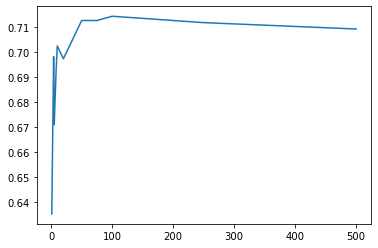

In [25]:
plt.plot(n_estimators_array, results)

In [26]:
max(results)

0.714164546225615

In [27]:
n_est = n_estimators_array[results.index(max(results))]
n_est

100

__*The optimal number of estimators is 100*__

## Tuning the Remaing Tree Parameters

In [28]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [29]:
rf = RandomForestClassifier(n_estimators=n_est)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [30]:
params = rf_random.best_params_
params

{'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50}

## Tuned Random Forest

In [31]:
forest = RandomForestClassifier(n_estimators=n_est,min_samples_leaf=params.get('min_samples_leaf'), 
                                max_features=params.get('max_features'), max_depth=params.get('max_depth'))
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_leaf=4)

In [32]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[776  68]
 [274  61]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       844
           1       0.47      0.18      0.26       335

    accuracy                           0.71      1179
   macro avg       0.61      0.55      0.54      1179
weighted avg       0.66      0.71      0.66      1179



__*The tunned model has a 71% overall accuracy, 66% overall precision and 18% recall, which is slightly worse than the original model.*__

## Feature Importance

In [33]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)

In [34]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

SYSBP       0.141575
BMI         0.139025
TOTCHOL     0.135449
AGE         0.122459
DIABP       0.113292
GLUCOSE     0.110316
HEARTRTE    0.087904
SEX         0.060915
CIGPDAY     0.044297
PREVHYP     0.019911
CURSMOKE    0.011133
DIABETES    0.007966
BPMEDS      0.005759
dtype: float64


<AxesSubplot:>

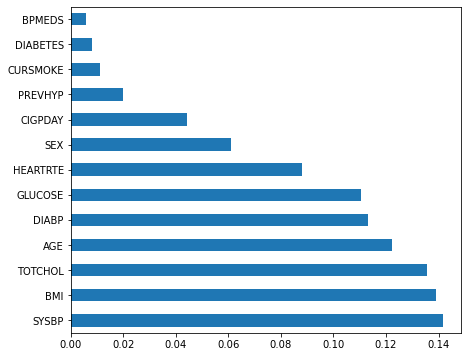

In [35]:
feature_importances.plot(kind='barh', figsize=(7,6))

## Random Forest for Period 2 (ANYCHD)

In [37]:
framinghamP2.head()

,RANDID,SEX,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,6238,2,52,105.0,69.5,0,0,0,260,29.43,86,0,80,0,0,0,0
1,9428,1,54,141.0,89.0,0,1,30,283,25.34,87,0,75,0,0,0,0
2,10552,2,67,183.0,109.0,0,1,20,232,30.18,89,0,60,1,0,1,1
3,11252,2,51,109.0,77.0,0,1,30,343,23.48,72,0,90,0,0,0,0
4,11263,2,49,177.0,102.0,1,0,0,230,31.36,86,0,120,1,1,0,0


## Train Test Split

In [38]:
x = framinghamP2.drop(['RANDID', 'ANYCHD', 'STROKE','DEATH'], axis = 1)
y = framinghamP2['ANYCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=76)

## Initial Random Forest Model

In [39]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

## Evaluate Model Fit

In [40]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[650  68]
 [221  54]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       718
           1       0.44      0.20      0.27       275

    accuracy                           0.71       993
   macro avg       0.59      0.55      0.55       993
weighted avg       0.66      0.71      0.67       993



***The model is has an accuracy of 71%, overall precision of 66%, and a recall of 20%.***

# Hyperparameter Tuning

## Additional Packages

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

## Number of Estimators

In [42]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.6797583081570997
4 : 0.7170191339375629
5 : 0.6958710976837865
8 : 0.7049345417925479
10 : 0.7129909365558912
20 : 0.7139979859013091
50 : 0.7129909365558912
75 : 0.7069486404833837
100 : 0.7069486404833837
250 : 0.7049345417925479
500 : 0.7089627391742196


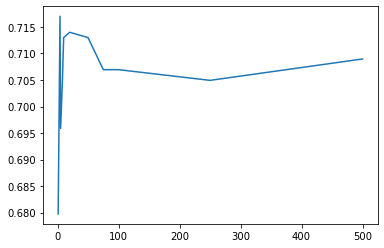

In [43]:
plt.plot(n_estimators_array, results)

In [44]:
max(results)

0.7170191339375629

In [45]:
n_est = n_estimators_array[results.index(max(results))]
n_est

4

__*The optimal number of estimators is 4*__

## Tuning the Remaing Tree Parameters

In [46]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [47]:
rf = RandomForestClassifier(n_estimators=n_est)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=4),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [48]:
params = rf_random.best_params_
params

{'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80}

## Tuned Random Forest

In [49]:
forest = RandomForestClassifier(n_estimators=n_est,min_samples_leaf=params.get('min_samples_leaf'), 
                                max_features=params.get('max_features'), max_depth=params.get('max_depth'))
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=80, n_estimators=4)

In [50]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[632  86]
 [233  42]]
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       718
           1       0.33      0.15      0.21       275

    accuracy                           0.68       993
   macro avg       0.53      0.52      0.50       993
weighted avg       0.62      0.68      0.64       993



__*The tunned model has a 68% overall accuracy, 62% overall precision and 15% recall, which is worse than the original model.*__

## Feature Importance

In [51]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)

In [52]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

SYSBP       0.140425
BMI         0.135774
TOTCHOL     0.126134
DIABP       0.121801
AGE         0.121076
GLUCOSE     0.114948
HEARTRTE    0.101673
PREVHYP     0.031867
CIGPDAY     0.030123
SEX         0.029863
CURSMOKE    0.018034
DIABETES    0.014530
BPMEDS      0.013752
dtype: float64


<AxesSubplot:>

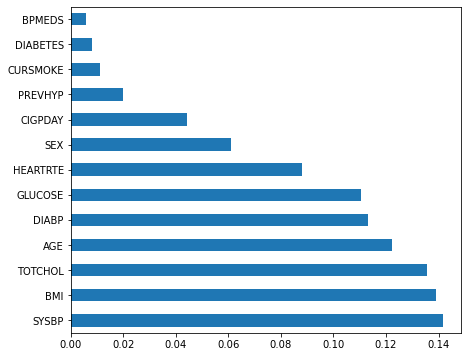

In [35]:
feature_importances.plot(kind='barh', figsize=(7,6))

## Random Forest for Period 3 (ANYCHD)

In [53]:
framinghamP3.head()

,RANDID,SEX,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,6238,2,58,108.0,66.0,0,0,0,237,54.0,141.0,28.50,71,0,80,0,0,0,0
1,11263,2,55,180.0,106.0,1,0,0,220,46.0,135.0,31.17,81,1,86,1,1,0,0
2,12806,2,57,110.0,46.0,0,1,30,320,34.0,286.0,22.02,87,0,75,0,0,0,0
3,14367,1,64,168.0,100.0,0,0,0,280,44.0,236.0,25.72,82,0,92,1,0,0,0
4,16365,1,55,173.0,123.0,1,0,0,211,48.0,163.0,29.11,85,0,75,1,0,0,0


## Train Test Split

In [54]:
x = framinghamP3.drop(['RANDID', 'ANYCHD', 'STROKE','DEATH'], axis = 1)
y = framinghamP3['ANYCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=76)

## Initial Random Forest Model

In [55]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

## Evaluate Model Fit

In [56]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[506  18]
 [146  22]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       524
           1       0.55      0.13      0.21       168

    accuracy                           0.76       692
   macro avg       0.66      0.55      0.54       692
weighted avg       0.72      0.76      0.70       692



***The model is has an accuracy of 76%, overall precision of 72%, and a recall of 13%.***

# Hyperparameter Tuning

## Additional Packages

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

## Number of Estimators

In [58]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.6459537572254336
4 : 0.7297687861271677
5 : 0.7095375722543352
8 : 0.7384393063583815
10 : 0.7427745664739884
20 : 0.7543352601156069
50 : 0.7543352601156069
75 : 0.7586705202312138
100 : 0.7543352601156069
250 : 0.7514450867052023
500 : 0.7630057803468208


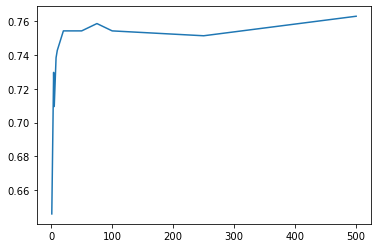

In [59]:
plt.plot(n_estimators_array, results)

In [60]:
max(results)

0.7630057803468208

In [61]:
n_est = n_estimators_array[results.index(max(results))]
n_est

500

__*The optimal number of estimators is 500*__

## Tuning the Remaing Tree Parameters

In [62]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [63]:
rf = RandomForestClassifier(n_estimators=n_est)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=500),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [64]:
params = rf_random.best_params_
params

{'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}

## Tuned Random Forest

In [65]:
forest = RandomForestClassifier(n_estimators=n_est,min_samples_leaf=params.get('min_samples_leaf'), 
                                max_features=params.get('max_features'), max_depth=params.get('max_depth'))
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                       n_estimators=500)

In [66]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[513  11]
 [155  13]]
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       524
           1       0.54      0.08      0.14       168

    accuracy                           0.76       692
   macro avg       0.65      0.53      0.50       692
weighted avg       0.71      0.76      0.68       692



__*The tunned model has a 76% overall accuracy, 71% overall precision and 8% recall, which is worse than the original model.*__

## Feature Importance

In [67]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)

In [68]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

HDLC        0.111003
SYSBP       0.108331
AGE         0.106192
LDLC        0.099555
GLUCOSE     0.095040
BMI         0.090901
DIABP       0.090466
TOTCHOL     0.087945
HEARTRTE    0.064949
SEX         0.048792
PREVHYP     0.038661
CIGPDAY     0.025650
DIABETES    0.016844
CURSMOKE    0.008948
BPMEDS      0.006723
dtype: float64


<AxesSubplot:>

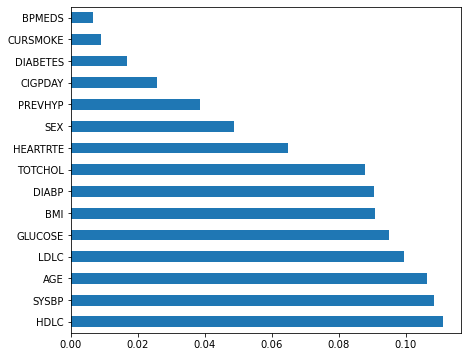

In [69]:
feature_importances.plot(kind='barh', figsize=(7,6))

# DEATH
---

## Random Forest for Period 1 (DEATH)

In [70]:
framinghamP1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    3927 non-null   int64  
 1   SEX       3927 non-null   int64  
 2   AGE       3927 non-null   int64  
 3   SYSBP     3927 non-null   float64
 4   DIABP     3927 non-null   float64
 5   BPMEDS    3927 non-null   int64  
 6   CURSMOKE  3927 non-null   int64  
 7   CIGPDAY   3927 non-null   int64  
 8   TOTCHOL   3927 non-null   int64  
 9   BMI       3927 non-null   float64
 10  GLUCOSE   3927 non-null   int64  
 11  DIABETES  3927 non-null   int64  
 12  HEARTRTE  3927 non-null   int64  
 13  PREVHYP   3927 non-null   int64  
 14  ANYCHD    3927 non-null   int64  
 15  STROKE    3927 non-null   int64  
 16  DEATH     3927 non-null   int64  
dtypes: float64(3), int64(14)
memory usage: 521.7 KB


## Train Test Split

In [71]:
x = framinghamP1.drop(['RANDID', 'DEATH'], axis = 1)
y = framinghamP1['DEATH']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

## Initial Random Forest Model

In [72]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

## Evaluate Model Fit

In [73]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[664 100]
 [180 235]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       764
           1       0.70      0.57      0.63       415

    accuracy                           0.76      1179
   macro avg       0.74      0.72      0.73      1179
weighted avg       0.76      0.76      0.76      1179



__*This model is has an accuracy and overall precision of 76%, and 57% recall.*__

# Hyperparameter Tuning

## Additional Packages

In [121]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

## Number of Estimators

In [122]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.726878612716763
4 : 0.7976878612716763
5 : 0.7933526011560693
8 : 0.8106936416184971
10 : 0.8164739884393064
20 : 0.8208092485549133
50 : 0.8222543352601156
75 : 0.8280346820809249
100 : 0.8294797687861272
250 : 0.8222543352601156
500 : 0.8208092485549133


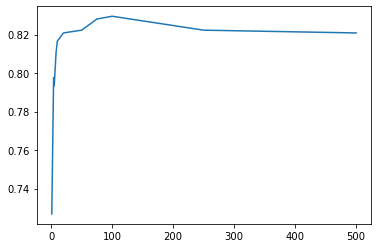

In [123]:
plt.plot(n_estimators_array, results)

In [77]:
max(results)

0.7659033078880407

In [78]:
n_est = n_estimators_array[results.index(max(results))]
n_est

250

__*The optimal number of estimators is 250*__

## Tuning the Remaing Tree Parameters

In [79]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [80]:
rf = RandomForestClassifier(n_estimators=n_est)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=250),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [81]:
params = rf_random.best_params_
params

{'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}

## Tuned Random Forest

In [82]:
forest = RandomForestClassifier(n_estimators=n_est,min_samples_leaf=params.get('min_samples_leaf'), 
                                max_features=params.get('max_features'), max_depth=params.get('max_depth'))
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                       n_estimators=250)

In [83]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[671  93]
 [176 239]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       764
           1       0.72      0.58      0.64       415

    accuracy                           0.77      1179
   macro avg       0.76      0.73      0.74      1179
weighted avg       0.77      0.77      0.77      1179



__*The tunned model has overall precision and accuracy of 77%, and a recall of 58%, a slight improvement from the original model.*__

## Feature Importance

In [84]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)

In [85]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

AGE         0.251013
ANYCHD      0.122364
SYSBP       0.113090
DIABP       0.073045
GLUCOSE     0.072122
TOTCHOL     0.071240
BMI         0.066727
HEARTRTE    0.053405
PREVHYP     0.047690
SEX         0.038881
CIGPDAY     0.035313
STROKE      0.033622
DIABETES    0.009142
CURSMOKE    0.008864
BPMEDS      0.003481
dtype: float64


<AxesSubplot:>

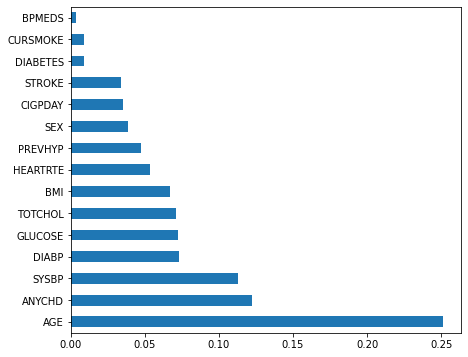

In [86]:
feature_importances.plot(kind='barh', figsize=(7,6))

## Random Forest for Period 2 (DEATH)

In [87]:
framinghamP2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    3309 non-null   int64  
 1   SEX       3309 non-null   int64  
 2   AGE       3309 non-null   int64  
 3   SYSBP     3309 non-null   float64
 4   DIABP     3309 non-null   float64
 5   BPMEDS    3309 non-null   int64  
 6   CURSMOKE  3309 non-null   int64  
 7   CIGPDAY   3309 non-null   int64  
 8   TOTCHOL   3309 non-null   int64  
 9   BMI       3309 non-null   float64
 10  GLUCOSE   3309 non-null   int64  
 11  DIABETES  3309 non-null   int64  
 12  HEARTRTE  3309 non-null   int64  
 13  PREVHYP   3309 non-null   int64  
 14  ANYCHD    3309 non-null   int64  
 15  STROKE    3309 non-null   int64  
 16  DEATH     3309 non-null   int64  
dtypes: float64(3), int64(14)
memory usage: 439.6 KB


## Train Test Split

In [88]:
x = framinghamP2.drop(['RANDID', 'DEATH'], axis = 1)
y = framinghamP2['DEATH']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

## Initial Random Forest Model

In [89]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

## Evaluate Model Fit

In [90]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[631  55]
 [167 140]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       686
           1       0.72      0.46      0.56       307

    accuracy                           0.78       993
   macro avg       0.75      0.69      0.70       993
weighted avg       0.77      0.78      0.76       993



__*This model is has an accuracy of 78%, an overall precision of 77% and a recall of 46%*__

# Hyperparameter Tuning

## Additional Packages

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

## Number of Estimators

In [92]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.6737160120845922
4 : 0.716012084592145
5 : 0.7280966767371602
8 : 0.7482376636455186
10 : 0.7583081570996979
20 : 0.7482376636455186
50 : 0.7643504531722054
75 : 0.7603222557905337
100 : 0.7663645518630413
250 : 0.770392749244713
500 : 0.7764350453172205


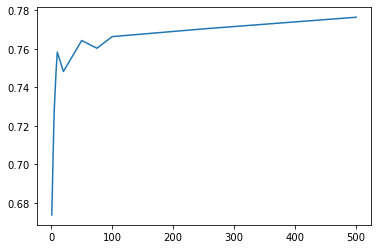

In [93]:
plt.plot(n_estimators_array, results)

In [94]:
max(results)

0.7764350453172205

In [95]:
n_est = n_estimators_array[results.index(max(results))]
n_est

500

__*The optimal number of estimators is 500*__

## Tuning the Remaing Tree Parameters

In [96]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [97]:
rf = RandomForestClassifier(n_estimators=n_est)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=500),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [98]:
params = rf_random.best_params_
params

{'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

## Tuned Random Forest

In [99]:
forest = RandomForestClassifier(n_estimators=n_est,min_samples_leaf=params.get('min_samples_leaf'), 
                                max_features=params.get('max_features'), max_depth=params.get('max_depth'))
forest.fit(x_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=500)

In [100]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[627  59]
 [173 134]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       686
           1       0.69      0.44      0.54       307

    accuracy                           0.77       993
   macro avg       0.74      0.68      0.69       993
weighted avg       0.76      0.77      0.75       993



__*The tunned model has a lower overall precision of 76%, accuracy of 77% and a positive recall of 44%, slightly worse than the original model.*__

## Feature Importance

In [101]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)

In [102]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

AGE         0.183903
SYSBP       0.123579
TOTCHOL     0.108296
BMI         0.108028
GLUCOSE     0.100203
DIABP       0.093091
HEARTRTE    0.077946
ANYCHD      0.054244
CIGPDAY     0.042648
SEX         0.027403
STROKE      0.025780
PREVHYP     0.018973
BPMEDS      0.014780
CURSMOKE    0.012809
DIABETES    0.008319
dtype: float64


<AxesSubplot:>

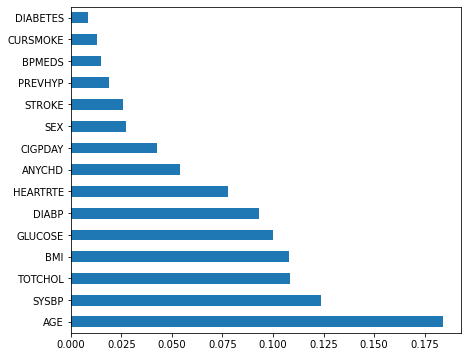

In [103]:
feature_importances.plot(kind='barh', figsize=(7,6))

## Random Forest for Period 3 (DEATH)

In [104]:
framinghamP3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    2306 non-null   int64  
 1   SEX       2306 non-null   int64  
 2   AGE       2306 non-null   int64  
 3   SYSBP     2306 non-null   float64
 4   DIABP     2306 non-null   float64
 5   BPMEDS    2306 non-null   int64  
 6   CURSMOKE  2306 non-null   int64  
 7   CIGPDAY   2306 non-null   int64  
 8   TOTCHOL   2306 non-null   int64  
 9   HDLC      2306 non-null   float64
 10  LDLC      2306 non-null   float64
 11  BMI       2306 non-null   float64
 12  GLUCOSE   2306 non-null   int64  
 13  DIABETES  2306 non-null   int64  
 14  HEARTRTE  2306 non-null   int64  
 15  PREVHYP   2306 non-null   int64  
 16  ANYCHD    2306 non-null   int64  
 17  STROKE    2306 non-null   int64  
 18  DEATH     2306 non-null   int64  
dtypes: float64(5), int64(14)
memory usage: 342.4 KB


## Train Test Split

In [105]:
x = framinghamP3.drop(['RANDID', 'DEATH'], axis = 1)
y = framinghamP3['DEATH']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

## Initial Random Forest Model

In [106]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

## Evaluate Model Fit

In [107]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[524  33]
 [ 91  44]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       557
           1       0.57      0.33      0.42       135

    accuracy                           0.82       692
   macro avg       0.71      0.63      0.65       692
weighted avg       0.80      0.82      0.80       692



__*This model is has an accuracy of 82%, an overall precision of 80%, and a positive recall of 33%.*__

# Hyperparameter Tuning

## Additional Packages

In [108]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

## Number of Estimators

In [109]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.726878612716763
4 : 0.7976878612716763
5 : 0.7933526011560693
8 : 0.8106936416184971
10 : 0.8164739884393064
20 : 0.8208092485549133
50 : 0.8222543352601156
75 : 0.8280346820809249
100 : 0.8294797687861272
250 : 0.8222543352601156
500 : 0.8208092485549133


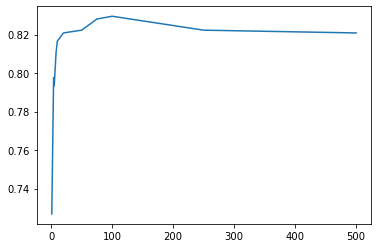

In [110]:
plt.plot(n_estimators_array, results)

In [111]:
max(results)

0.8294797687861272

In [112]:
n_est = n_estimators_array[results.index(max(results))]
n_est

100

__*The optimal number of estimators is 100*__

## Tuning the Remaing Tree Parameters

In [113]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [114]:
rf = RandomForestClassifier(n_estimators=n_est)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [115]:
params = rf_random.best_params_
params

{'min_samples_leaf': 4, 'max_features': None, 'max_depth': 40}

## Tuned Random Forest

In [116]:
forest = RandomForestClassifier(n_estimators=n_est,min_samples_leaf=params.get('min_samples_leaf'), 
                                max_features=params.get('max_features'), max_depth=params.get('max_depth'))
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=40, max_features=None, min_samples_leaf=4)

In [117]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[518  39]
 [ 86  49]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       557
           1       0.56      0.36      0.44       135

    accuracy                           0.82       692
   macro avg       0.71      0.65      0.67       692
weighted avg       0.80      0.82      0.80       692



__*The tunned model has a lower overall precision 80%, accuracy of 82%, and a positive recall of 36%, a slight improvemet on the original model*__

## Feature Importance

In [118]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)

In [119]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

AGE         0.172426
ANYCHD      0.114530
GLUCOSE     0.109426
BMI         0.085836
SYSBP       0.084569
TOTCHOL     0.064427
HDLC        0.062187
DIABP       0.060989
HEARTRTE    0.060317
LDLC        0.056714
STROKE      0.037844
CIGPDAY     0.033108
SEX         0.032832
BPMEDS      0.010399
DIABETES    0.007568
PREVHYP     0.005312
CURSMOKE    0.001515
dtype: float64


<AxesSubplot:>

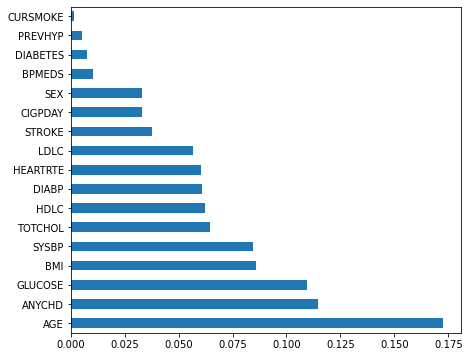

In [120]:
feature_importances.plot(kind='barh', figsize=(7,6))